In [ ]:
pip install pynamics

     |████████████████████████████████| 87 kB 2.8 MB/s 


In [ ]:
pip install idealab_tools

In [ ]:
%matplotlib inline

In [ ]:
use_constraints = True

In [ ]:
#Importing necessary libraries
import pynamics
from pynamics.frame import Frame
import idealab_tools.units
from pynamics.variable_types import Differentiable,Constant
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.particle import Particle
import pynamics.integration
from pynamics.constraint import KinematicConstraint,AccelerationConstraint

In [ ]:
#Import Libraries for mathematical functions
import sympy
import numpy
import matplotlib.pyplot as plt
plt.ion()
from math import pi
system = System()
pynamics.set_system(__name__,system)

In [ ]:
#Define unit scale
idealab_tools.units.Unit.set_scaling(meter=1)

In [ ]:
#Define constants for the system
lA = Constant(9*idealab_tools.units.length,'lA',system)
lB = Constant(4.5*idealab_tools.units.length,'lB',system)
#lC = Constant(13*idealab_tools.units.length,'lC',system) #stiffness
lC1 = Constant(6.5*idealab_tools.units.length,'lC1',system)
lC2 = Constant(6.5*idealab_tools.units.length,'lC2',system) #splitting fixed link into two for stiffness representation
lD = Constant(7*idealab_tools.units.length,'lD',system) #servo

m = Constant(1*idealab_tools.units.mass,'m',system)

g = Constant(9.81*idealab_tools.units.acceleration,'g',system)
#b = Constant(1e1,'b',system) #dampening coefficient
stiffness = Constant(9.4e6,'stiffness',system)
b = Constant(1e1,'b',system) #dampening coefficient
k = Constant(8*1.1224,'k',system) #stiffness
#k = Constant(1.1224,'k',system) #stiffness

preload1 = Constant(-135*pi/180,'preload1',system)
preload2 = Constant(50*pi/180,'preload2',system)
preload3 = Constant(15*pi/180,'preload3',system)
preload4 = Constant(-90*pi/180,'preload4',system)
#
preload5 = Constant(0*pi/180,'preload5',system)

#Define moment of inertia for the links
Ixx_A = Constant(1*idealab_tools.units.inertia,'Ixx_A',system)
Iyy_A = Constant(1*idealab_tools.units.inertia,'Iyy_A',system)
Izz_A = Constant(1*idealab_tools.units.inertia,'Izz_A',system)
Ixx_B = Constant(1*idealab_tools.units.inertia,'Ixx_B',system)
Iyy_B = Constant(1*idealab_tools.units.inertia,'Iyy_B',system)
Izz_B = Constant(1*idealab_tools.units.inertia,'Izz_B',system)
#Ixx_C = Constant(1*idealab_tools.units.inertia,'Ixx_C',system)
#Iyy_C = Constant(1*idealab_tools.units.inertia,'Iyy_C',system)
#Izz_C = Constant(1*idealab_tools.units.inertia,'Izz_C',system)
Ixx_C1 = Constant(1*idealab_tools.units.inertia,'Ixx_C1',system)
Iyy_C1 = Constant(1*idealab_tools.units.inertia,'Iyy_C1',system)
Izz_C1 = Constant(1*idealab_tools.units.inertia,'Izz_C1',system)
Ixx_C2 = Constant(1*idealab_tools.units.inertia,'Ixx_C2',system)
Iyy_C2 = Constant(1*idealab_tools.units.inertia,'Iyy_C2',system)
Izz_C2 = Constant(1*idealab_tools.units.inertia,'Izz_C2',system)
Ixx_D = Constant(1*idealab_tools.units.inertia,'Ixx_D',system)
Iyy_D = Constant(1*idealab_tools.units.inertia,'Iyy_D',system)
Izz_D = Constant(1*idealab_tools.units.inertia,'Izz_D',system)


#torque = Constant(4e2,'torque',system)
torque = Constant(555e-3,'torque',system)
freq = Constant(1e0,'freq',system)

In [ ]:
#Defining differentiable State values
qA,qA_d,qA_dd = Differentiable('qA',system)
qB,qB_d,qB_dd = Differentiable('qB',system)
#qC,qC_d,qC_dd = Differentiable('qC',system)
qC1,qC_d1,qC_dd1 = Differentiable('qC1',system)
qC2,qC_d2,qC_dd2 = Differentiable('qC2',system)
qD,qD_d,qD_dd = Differentiable('qD',system)


In [ ]:
initialvalues = {}
initialvalues[qA]=340*pi/180*idealab_tools.units.radian
initialvalues[qA_d]=0*pi/180*idealab_tools.units.rotational_speed
initialvalues[qB]=-40*pi/180*idealab_tools.units.radian
initialvalues[qB_d]=0*pi/180*idealab_tools.units.rotational_speed
#initialvalues[qC]=0*pi/180*idealab_tools.units.radian
#initialvalues[qC_d]=0*pi/180*idealab_tools.units.rotational_speed
initialvalues[qC1]=0*pi/180*idealab_tools.units.radian
initialvalues[qC_d1]=0*pi/180*idealab_tools.units.rotational_speed
initialvalues[qC2]=0*pi/180*idealab_tools.units.radian
initialvalues[qC_d2]=0*pi/180*idealab_tools.units.rotational_speed
initialvalues[qD]=-110*pi/180*idealab_tools.units.radian
initialvalues[qD_d]=0*pi/180*idealab_tools.units.rotational_speed

In [ ]:
statevariables = system.get_state_variables()

In [ ]:
#Define reference Frames
N = Frame('N',system)
A = Frame('A',system)
B = Frame('B',system)
#C = Frame('C',system)
C1 = Frame('C1',system)
C2 = Frame('C2',system)
D = Frame('D',system)

In [ ]:
#Defining the Newtonian Reference frame for the system
system.set_newtonian(N)

In [ ]:
#Rotating all frames by amount q from the previous
A.rotate_fixed_axis(N,[0,0,1],qA,system)
B.rotate_fixed_axis(A,[0,0,1],qB,system)
#C.rotate_fixed_axis(N,[0,0,1],qC,system)
C1.rotate_fixed_axis(N,[0,0,1],qC1,system)
C2.rotate_fixed_axis(C1,[0,0,1],qC2,system)
D.rotate_fixed_axis(C2,[0,0,1],qD,system)

In [ ]:
#Defining vectors
pNA = 0*N.x
pAB = pNA + lA*A.x
pBD = pAB + lB*B.x
#pCD = pNA + lC*C.x
pCD1 = pNA + lC1*C1.x
pCD2 = pCD1 + lC2*C2.x
#pDB = pCD + lD*D.x
pDB = pCD2 + lD*D.x

#end effector estimations
ee=pAB + (lB/2)*B.x

#eq = [lA*A.x + lB*B.x - lC*C.x - lD*D.x]

In [ ]:
#points = [pBD,pAB,pNA,pCD,pDB]
points = [pBD,pAB,pNA,pCD1,pCD2,pDB]

In [ ]:
statevariables = system.get_state_variables()
ini0 = [initialvalues[item] for item in statevariables]

In [ ]:
eq = []
#eq.append(pBD-pCD)
eq.append(pBD-pDB)


In [ ]:
eq_scalar = []
eq_scalar.append(eq[0].dot(N.x))
eq_scalar.append(eq[0].dot(N.y))
#eq_scalar.append(qC-0*180/pi)
eq_scalar.append(qC1-0*180/pi)
eq_scalar.append(qC2-0*180/pi)

#eq_scalar.append(eq[0].dot(C.x))
#eq_scalar.append(eq[0].dot(C.y))

In [ ]:
c=KinematicConstraint(eq_scalar)

In [ ]:
#variables = [qB,qD]
variables = [qA,qB,qD]

In [ ]:
constant_states = list(set(system.get_q(0))-set(variables))

In [ ]:
constants = system.constant_values.copy()

In [ ]:
for key in constant_states:
    constants[key] = initialvalues[key] 

In [ ]:
guess = [initialvalues[item] for item in variables]

In [ ]:
result = c.solve_numeric(variables,guess,constants)

In [ ]:
ini = []
for item in system.get_state_variables():
    if item in variables:
        ini.append(result[item])
    else:
        ini.append(initialvalues[item])

2022-04-14 16:52:19,761 - pynamics.output - INFO - calculating outputs
2022-04-14 16:52:19,763 - pynamics.output - INFO - done calculating outputs


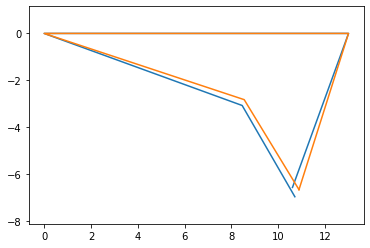

In [ ]:
points = PointsOutput(points, constant_values=system.constant_values)
points.calc(numpy.array([ini0,ini]),[0,1])
points.plot_time()

In [ ]:
#Defining centre of mass for the links at their midpoints
pAcm=pNA+lA/2*A.x
pBcm=pAB+lB/2*B.x
#pCcm=pNA+lC/2*C.x
pCcm1=pNA+lC1/2*C1.x
pCcm2=pCD1+lC2/2*C2.x
pDcm=pCD2+lD/2*D.x

In [ ]:
#Angular velocities
wNA = N.get_w_to(A)
wAB = A.get_w_to(B)
#wBC = B.get_w_to(C)
wBC = B.get_w_to(C1)
wC1C2 = C1.get_w_to(C2)
wND = N.get_w_to(D)

In [ ]:
#Computing the inertia dyadics of each body and defining the rigid frames
IA = Dyadic.build(A,Ixx_A,Iyy_A,Izz_A)
IB = Dyadic.build(B,Ixx_B,Iyy_B,Izz_B)
#IC = Dyadic.build(C,Ixx_C,Iyy_C,Izz_C)
IC1 = Dyadic.build(C1,Ixx_C1,Iyy_C1,Izz_C1)
IC2 = Dyadic.build(C2,Ixx_C2,Iyy_C2,Izz_C2)
ID = Dyadic.build(D,Ixx_D,Iyy_D,Izz_D)

BodyA = Body('BodyA',A,pAcm,m,IA,system)
BodyB = Body('BodyB',B,pBcm,m,IB,system)
#BodyC = Body('BodyC',C,pCcm,m,IC,system)
BodyC1 = Body('BodyC1',C1,pCcm1,m,IC1,system)
BodyC2 = Body('BodyC2',C2,pCcm2,m,IC2,system)
BodyD = Body('BodyD',D,pDcm,m,ID,system)

In [ ]:
system.addforce(torque*sympy.sin(freq*2*sympy.pi*system.t)*A.z,wNA)

#Damper
#system.addforce(-b*wNA,wNA)
#system.addforce(-b*wAB,wAB)
system.addforce(-b*wBC,wBC)
system.addforce(-stiffness*wC1C2,wC1C2) #added stiffness to the long link (high stiffness makes it act like a link)

In [ ]:
#Spring forces are a special case because the energy stored in springs is conservative and should be considered when calculating the system’s potential energy.
#To do this, use the add_spring_force command. In this method, the first value is the linear spring constant.
#The second value is the “stretch” vector, indicating the amount of deflection from the neutral point of the spring
#The final parameter is, as above, the linear or angluar velocity vector (depending on whether your spring is a linear or torsional spring)
#In this case, the torques applied to each joint are dependent upon whether qA, qB, and qC are absolute or relative rotations, as defined above.
#system.add_spring_force1(k,(qA-preload1)*N.z,wNA) 
#system.add_spring_force1(k,(qB-preload2)*A.z,wAB)

system.add_spring_force1(k,(qC1-preload3)*B.z,wBC)
system.add_spring_force1(k,(qC2-preload3)*B.z,wC1C2)

#add the force here and see how the plot output is going to change over time the use optimization


(<pynamics.force.Force at 0x7ff76a517290>,
 <pynamics.spring.Spring at 0x7ff76a507a90>)

In [ ]:
#system.addforcegravity(-g*N.y)

In [ ]:
eq_d = [item.time_derivative() for item in eq]
eq_dd = [item.time_derivative() for item in eq_d]
eq_dd_scalar = []
eq_dd_scalar.append(eq_dd[0].dot(N.x))
eq_dd_scalar.append(eq_dd[0].dot(N.y))
eq_dd_scalar.append(qC_dd1)
#eq_dd_scalar.append(qC_dd2) 

#eq_dd_scalar.append(eq_dd[0].dot(C.x))
#eq_dd_scalar.append(eq_dd[0].dot(C.y))

In [ ]:
system.add_constraint(AccelerationConstraint(eq_dd_scalar))

In [ ]:
f,ma = system.getdynamics()
func1 = system.state_space_post_invert(f,ma)

2022-04-14 16:52:20,480 - pynamics.system - INFO - getting dynamic equations
2022-04-14 16:52:21,040 - pynamics.system - INFO - solving a = f/m and creating function
2022-04-14 16:52:21,484 - pynamics.system - INFO - substituting constrained in Ma-f.
2022-04-14 16:52:22,119 - pynamics.system - INFO - done solving a = f/m and creating function


In [ ]:
#Defining variables for time to create a time array
fps = 30/(1*idealab_tools.units.time)
tinitial = 0*idealab_tools.units.time
tfinal = 5*idealab_tools.units.time
tstep = 1/fps
t = numpy.r_[tinitial:tfinal:tstep]
tolerance = 1e-12

In [ ]:
states=pynamics.integration.integrate_odeint(func1,ini,t,rtol=tolerance,atol=tolerance,args=({'constants':system.constant_values},))

2022-04-14 16:52:22,194 - pynamics.integration - INFO - beginning integration
2022-04-14 16:52:22,196 - pynamics.system - INFO - integration at time 0000.00
2022-04-14 16:52:23,625 - pynamics.system - INFO - integration at time 0001.62
2022-04-14 16:52:25,150 - pynamics.system - INFO - integration at time 0004.03
2022-04-14 16:52:25,763 - pynamics.integration - INFO - finished integration


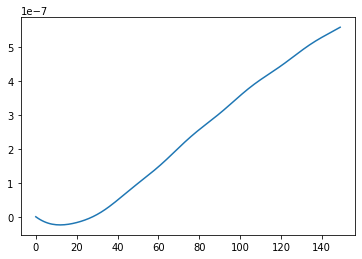

In [ ]:
#Plotting motion of a specific joint,
plt.plot(states[:,3])

2022-04-14 16:52:26,234 - pynamics.output - INFO - calculating outputs
2022-04-14 16:52:26,244 - pynamics.output - INFO - done calculating outputs


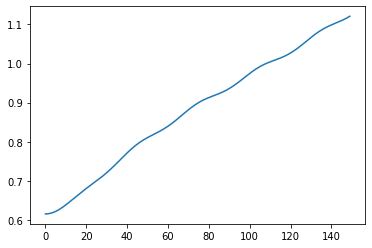

In [ ]:
KE = system.get_KE()
PE = system.getPEGravity(pNA) - system.getPESprings()
#Energy when actuator in on
energy_output = Output([KE-PE],system)
energy_output.calc(states,t)
energy_output.plot_time()

2022-04-14 16:52:26,540 - pynamics.output - INFO - calculating outputs
2022-04-14 16:52:26,581 - pynamics.output - INFO - done calculating outputs


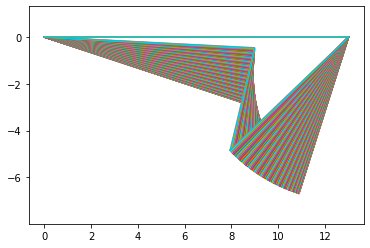

In [ ]:
points.calc(states,t)
points.plot_time()

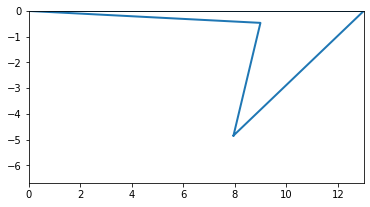

In [ ]:
points.animate(fps = fps,movie_name = 'four_bar.mp4',lw=2)

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML
HTML(points.anim.to_html5_video())

In [ ]:
system.get_state_variables()

[qA, qB, qC1, qC2, qD, qA_d, qB_d, qC1_d, qC2_d, qD_d]

End effector displacement / Torque = End effector output force